In [2]:
import pandas as pd

# Load dataset
dataset_path = r"D:/Dataset-SA.csv"
df = pd.read_csv(dataset_path)

# Check data
print(df.head())

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  


In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


In [4]:
texts = df['Review'].values  
labels = df['Sentiment'].values  


In [5]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [6]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [7]:
print(train_texts[:10])  # Print the first 10 entries to inspect them
print(type(train_texts))  # Ensure it's a numpy array or list
print(type(train_texts[0]))  # Ensure each entry is a string


['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']
<class 'numpy.ndarray'>
<class 'str'>


In [8]:
import numpy as np

# Ensure that the array contains no NaN values or non-string objects
train_texts = np.array([str(text) if pd.notna(text) else '' for text in train_texts])

# Inspect again after cleaning
print(train_texts[:10])  # Check the first 10 entries


['wonderful' 'wonderful' 'slightly disappointed' 'mind-blowing purchase'
 'nice product' 'fabulous!' 'worth the money' 'useless product'
 'expected a better product' 'terrible product']


In [9]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)  # This should work after cleaning


In [10]:
train_texts = [str(text) if isinstance(text, (int, float)) else text for text in train_texts]
val_texts = [str(text) if isinstance(text, (int, float)) else text for text in val_texts]


In [11]:
# Tokenize and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)



In [12]:
max_length = 100  # You can adjust this based on your dataset size and requirements

# Now pad sequences
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post', truncating='post')


In [13]:
import tensorflow as tf

In [14]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=3)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 output classes: positive, negative, neutral
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Since labels are one-hot encoded
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,051,843
Trainable params: 1,051,843
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train the model
history = model.fit(train_padded, train_labels, 
                    validation_data=(val_padded, val_labels),
                    epochs=10,  # You can increase this for better performance
                    batch_size=32)  # Adjust batch size as needed


Epoch 1/10
5127/5127 [==============================] - 49s 9ms/step - loss: 0.3559 - accuracy: 0.8945 - val_loss: 0.3410 - val_accuracy: 0.8998
Epoch 2/10
5127/5127 [==============================] - 46s 9ms/step - loss: 0.3461 - accuracy: 0.8972 - val_loss: 0.3404 - val_accuracy: 0.8998
Epoch 3/10
5127/5127 [==============================] - 46s 9ms/step - loss: 0.3445 - accuracy: 0.8975 - val_loss: 0.3419 - val_accuracy: 0.8998
Epoch 4/10
5127/5127 [==============================] - 47s 9ms/step - loss: 0.3434 - accuracy: 0.8976 - val_loss: 0.3428 - val_accuracy: 0.8998
Epoch 5/10
5127/5127 [==============================] - 48s 9ms/step - loss: 0.3429 - accuracy: 0.8977 - val_loss: 0.3401 - val_accuracy: 0.8997
Epoch 6/10
5127/5127 [==============================] - 49s 9ms/step - loss: 0.3429 - accuracy: 0.8977 - val_loss: 0.3404 - val_accuracy: 0.8997
Epoch 7/10
5127/5127 [==============================] - 47s 9ms/step - loss: 0.3422 - accuracy: 0.8978 - val_loss: 0.3420 - val_ac

In [17]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_padded, val_labels)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")


1282/1282 [==============================] - 2s 1ms/step - loss: 0.3423 - accuracy: 0.8997
Validation Accuracy: 89.97%


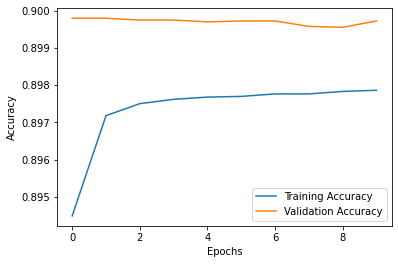

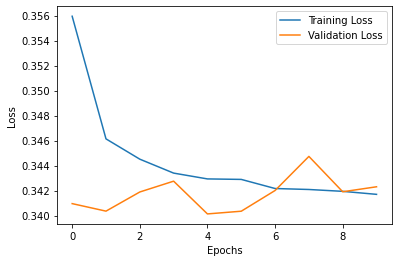

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Sample text input
new_text = ["This product is fantastic!"]

# Preprocess the new text
new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded = pad_sequences(new_sequences, maxlen=max_length, padding='post', truncating='post')

# Make prediction
prediction = model.predict(new_padded)
predicted_label = label_encoder.inverse_transform([prediction.argmax(axis=-1)[0]])

print(f"Predicted Sentiment: {predicted_label[0]}")


Predicted Sentiment: positive
